# Evolutionary Computation - Enabling AI Technology
Aaron Collinsworth

In [1]:
import pylab as pl
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import clear_output

## Technology and Application Overview
Evolutionary computation is a branch of artificial intelligence that is used for mathematical optimization. Many different types of algorithms exist in the field of evolutionary computation, each with their own similarities and differences. The common denominator between them is that they contain populations of solutions that are modified using various methods in order to navigate a problem's search space with the goal of finding the optimum to an objective function. Evolutionary algorithms perform well in circumstances in which a gradient cannot be calculated and therefore other methods such as gradient descent cannot be applied. This opens itself up to the possibility of being used for applications requiring combinatorial optimization requiring discrete combinations of items to be arranged in a way to satisfy a problem's constraints. 

The demonstration in this notebook will be of one of the simplest evolutionary computation algorithms: the genetic algorithm. The problem that it will be demonstrated is visual, where a graph layout is aimed to be made aesthetic by minimizing the number of line crossings. A bipartite graph is defined as a graph where two disjoint sets of vertices contain edges between the sets but not between any of the other vertices in the same set. An example is plotted below:

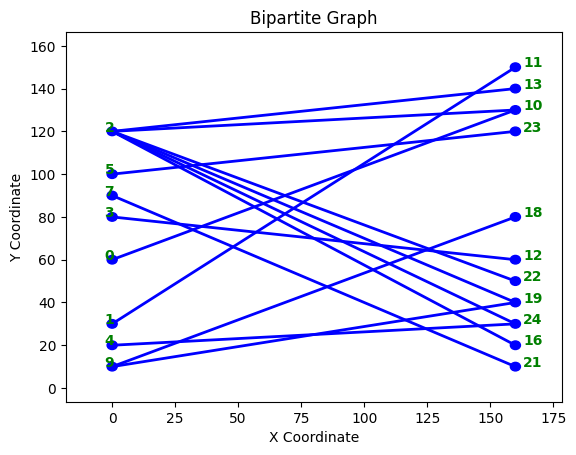

In [2]:
# Generate random bipartite graph and display for visual demonstration
%matplotlib inline
import Optimize_Layout.Bi_Graph as big
import Optimize_Layout.GA_Visualization as gv
import Optimize_Layout.Gen_Bipartite_Graph as gbg

# Create networkx object and corresponding bigraph object
network = gbg.gen_bipartite_graph(10, 15, 12, 20, 15)
graph = big.Bi_Graph(network)

gv.plot_graph(graph)

The function `gen_bipartite_graph(left_lb, left_ub, right_lb, right_ub, num_edges)` creates a random bipartite graph with the first two arguments lower and upper bounds of a random sample in which to generate the number of nodes in that "column" for. Arguments 3 & 4 are the same but for column 2. The 5th argument is the number of edges. This is the random bipartite graph generator used in all following experiments. Notice how each set of nodes can be divided into two levels in which nodes in each level only connect to nodes of the other level. This particular type of graph was chosen for simplicity and it's potential to yield insight that could potentially be extended to more complicated graphs in the future. The number of line crossings between the edges is used as the objective function for individual evaluations.

## Genetic Algorithm Overview

Genetic algorithms aim to maximize or minimize a fitness function. Fitness is a measure of a solution's performance with respect to an objective. A population is made up of many individuals that contain a fitness value. The fitness values of the population's individuals drives the process for genetic manipulation through different operations. The entire process is highly tailorable to a problem that is being modeled. 

Genetic algorithms have the advantage over traditional optimization methods by being able to search non-differentiable search spaces. The genetic algorithm begins with a initialized population of candidate solutions. Initial solutions can be randomized or chosen with some predetermined methodology. Once initialized, the evolutionary process follows several steps carried out by genetic operators. The genetic operators are described in detail below:

**Selection:** Two parents are selected from the population in order to create an offspring that will produce the next generation. Several methods exist for selection, two popular ones being roulette wheel and tournament selection. Roulette wheel selection assigns a probability of an individual being chosen based on their fitness value. The higher the fitness, the higher the chance of being chosen for reproduction. Roulette wheel selection is susceptible to favoring high fitness individuals in the search space and can converge on local optimum. Tournament selection chooses a subpopulation from the main population with the size being a tunable hyperparameter. Tournament selection is generally less likely to converge prematurely on suboptimal solutions and is chosen as the selection operator for the demonstration.

**Crossover:** Crossover is conducted between two selected parents to create offspring. The concept is that the two selected parents can create offspring with attributes of each parent that produce good fitness values. Different methods of crossover exist and often depend on the problem. The problem can be encoded in a bit string and different operation can be conducted on the bit string such as taking segments of each parent and recombining them into offspring. A few common methods of crossover include one & two point as well as uniform crossover. One and two point splits and recombines at either one or two points while uniform crossover uses a probability to determine if a bit of the string will be crossed over. Example image shown below:

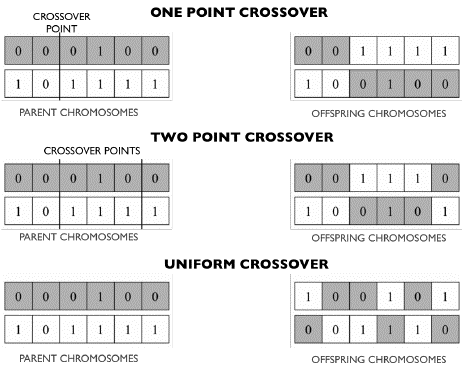

In [3]:
Image(filename='Images/Crossover.png', width = 1000, height = 700)

Image borrowed from:
K. Sastry, D. Goldberg, and G. Kendall, “Genetic algorithms,” in Search
methodologies, pp. 97–125, Springer, 2005.

For the bipartite graph application, the y positions of one level will be swapped between two chosen parents without encoding into a bit string. A crossover rate is introduced as a tunable hyper parameter that indicates whether the parents are crossed with eachother or not. If chosen for crossover, the crossover operator will be carried out. In the case crossover is not chosen, the parents will continue through the genetic process.

**Mutation:** Mutation also contains a hyperparameter known as the mutation rate that decides the probability of the offspring mutated once crossover has taken place. If selected for mutation, then the offspring will be altered. As with crossover, many schemes for mutation exist. If encoded as a bit string a random bit can simply be flipped. For the chosen application, the position of a node is altered. If the randomly selected altered position conflicts with another node in the level, then the node positions are swapped.

Selection-Crossover-Mutation operations are carried out until the next generation's population with a specified size is created. Only a selected number of top fit individuals from the previous generation are selected to move on to the next generation. This is known as elitism. A specified number of individuals pass to the next generation automatically. Generations are iterated until a convergence criteria is met. Either a non-improving best solution or until a maximum number of iterations is reached are often used to terminate the evolutionary process.

**GA Operator Demo - Demos/Genetic_Operator_Demo.ipynb:** This demonstration shows the crossover and mutation operators, giving a visualization into what the operators are doing internally.

A few more important aspects of genetic algorithms will be discussed.

**Diversity:** Diversity refers to the population to maintain different solutions. Evolutionary algorithms tend to repopulate with the most fit solutions as generations progress. Different techniques for assuring a diverse population to repopulate the next generation with exist. This comes at a cost of checking if the solution is present in the current population but reduces fitness function evaluations in return. For the current implementation, repeat solutions are not allowed in the population. This helps guide the search and prevent it from stagnating. Another popular method for maintaining diversity is fitness sharing. Fitness sharing penalizes solutions with the same fitness by splitting the total fitness between all solutions within a specified distance of that fitness.

**Fitness Evaluation:** In evolutionary algorithms the most expensive component is evaluating an individuals fitness. Since during each generation each individual is evaluated independant of eachother, parallelization can be used to simultaneously evaluate the fitnesses of a population's individuals in a generational cycle. Evolutionary algorithms are considered inefficient compared to similar methods but the parrallel nature of them allow them to be sped up with the correct computing infrastructure. 

The current application's fitness evaluation is based on the number of line crossings of all line segments. The naive approach translates to checking every edge against every edge to check for intersections. The worst case time complexity is O(n^2) where n is the number of edges. This is too slow for a genetic algorithm which requires many function evaluations. In order to remedy this, a faster approach is used.

The sweep line algorithm known as the Bentley-Ottoman algorithm is capable of calculating number of intersections of a set of line segments with a worst case O(nlog(n)). This algorithm played in important role in making the implementation feasible. A cython implementation of the algorithm is used known as fast-crossing. The github for the algorithm is linked below:

https://github.com/cubao/fast-crossing

**Note:** The fast crossing algorithm counts end point connections as intersections. In the application using genetic algorithms, the fitnesses are relative and therefore counting the end point connections is the same for each individual. Since it is relative, this algorithm knows which solutions are better and are able to evolve solutions without additional modifications to the fast-cross algorithm.

Evolutionary algorithms do not perform well in circumstances where the fitness function is computationally expensive due to the number of function evaluations required. The fitness function should aim to be better than polynomial unless the application can compromise on speed.

**GA Demo - Demos/GA_Demonstration.ipynb:** In the demonstration notebook, the genetic algorithm will be ran showing the improvement stages at each improvement. The final plot shows the comparison of the original graph compared with the optmized graph, demonstrating the effectiveness of the optimized graph compared with the original graph.

#### Business Value

Evolutionary algorithms are able to provide business value by optimizing difficult optimization problems. Difficult optimization problems are highly abundant in all avenues of problems related to business. Evolutionary algorithms are able to optimize real world problems and give excellent results in many circumstances. Normally real world applications tend to require approximations and exact solutions are difficult to achieve, so using a heuristic instead of an exact algorithm is common. Evolutionary approaches have their disadvantages, but are certainly a good option to explore if the optimization problem has a difficult search landscape to explore. Some business specific applications include schedule optimization and multi objective optimization such as optimizing cost vs time. The amount of business cases that evolutionary computation optimization can be used for is vast.

## Evolutionary Algorithms: Pros and Cons

Evolutionary algorithms hold advantages over other optimization techniques. On the contrary, there are many use cases where evolutionary computation is not the best suited. This is no surprise due to the no free lunch theorem. Some of the advantages and disadvantages have been discussed so far but will be completely outlined in this section.


##### Pros:

**Solve Complex Problems:** Evolutionary algorithms can be implemented to optimize complex problems with noisy enviroments. Most complicated optimization problems contain some level of noise and being able to navigate around noise and produce a good solution is a critical design consideration.

Additionally, as previously mentioned, problems where a gradient cannot be computed is where evolutionary algorithms and other stochastic methods are able to overcome shortcomings of traditional gradient based methods. This is especially important for combinatorial optimization problems which by nature are normally NP-Hard. Evolutionary algorithms can often provide a a good heuristic to this class of problems. While global optimums are not guaranteed, they are capable of finding the global optimum of complex search spaces.

**Diversity:** The diversity aspect of evolutionary computation methods hold advantages over other stochastic methods such as simulated annealing since they are able to maintain a more diverse pool of solutions. Maintaining this diverseness assures more search space is exhausted during search and helps guide the search to global or better local optimums.

**Ease of Development:** Evolutionary algorithms are fairly simple representations. Each have similar techniques with the difference lying largely on in the mechanics of their population and genetic operators. Some problems require slightly different representations based on how the crossover and mutation take place, but in general the process follows the same framework for most evolutionary algorithm procedures. 

**Parallelization:** Since the individuals are independant of eachother for each generation, it is possible to run each individuals fitness function evaluation in parallel. This has the potential to speed up convergence significantly.

##### Cons:

**Computation Time:** Evolutionary algorithms can take many function evaluations to arrive at a satisfactory solution. Problems with large search space may suffer longer convergence times, but this is not entirely unique to evolutionary algorithms. Different techniques exist for guiding the search more efficiently and running function evaluations in parallel. This helps remedy the problem of requiring many unneeded function evalutions that can be costly. It is important to note that if the fitness function is computationally expensive then an evolutionary algorithm will not scale well due to the number of function evaluations required.

**Heuristic:** Since evolutionary algorithms are a hueristic, they provide only an approximation and cannot garauntee a global optimum. With many NP-Hard problems a global optimum is not garaunteed by a lot of methods, so this isn't entirely a disadvantage for evolutionary algorithms for more complex problems. However, for simpler problems where exact solutions can be achieved by traditional algorithms then evolutionary algorithms are not the best option. Additionally, stochastic methods as whole can be unpredictable and not work well for a particular problems. Especially if not formulated correctly.

**Tuning:** Many hyper parameters exist in an evolutionary algorithm that require tweaking in order to get the best performance. This can require a great deal of testing if high performance in the application is crucial.

## Technical Value

As deduced from the pros and cons above, evolutionary algorithms are highly capable of solving problems that are normally too difficult for other options to solve. Their simple representations allow for fairly quick develoment. The ability to tune them can become difficult but provides a lot of flexibility in finding a set of parameters that yields satisfactory solutions. Evolutionary algorithms are a hot topic in research and have more discoveries to be made. They may not be the best option for simple cases or cases where exact algorithms can be used. They do offer a promising approach to problems that no other algorithm can provide good answers to.

## Comparable Methods


**Random Search:** Random search naively searches a fitness landscape by generating random solutions. This will be the method used to compare the demonstrated evolutionary algorithm to prove that evolutionary algorithms can prefer better than to naive random search.

**Linear/Integer Programming:** Linear programming is an optimization technique that is expressed in terms of linear relationships and constraints. Given a set of constraints and linear relationships among variables, this technique can search for feasible solutions that find values of the input variables that satisfy the constraints. A special type of linear programming called integer programming can deal with combinatorial optimization and not just continuous functions. Linear programming is one of the most robust ways to optimize linear problems, where the problem becomes a linear algebra problem and can be solved quickly. This type of method is a go to in optimization if the problem can be formulated as simple linear representation.

Comparing with evolutionary algorithms, linear programming can solve simpler problems much more efficiently. However, they cannot handle non-linear problems and complex search spaces. Sometimes, formulating a problem as a linear programming problem can be difficult even if the optimization function is known. All real world models are not able to fit adequately into a linear programming model. The more complex scenerios are where techniques such as evolutionary computation can be a better option.

**Simulated Annealing:** Simulated Annealing is another stochastic search process. As opposed to the population of solutions of evolutionary algorithms, simulated annealing only has one population. The search uses a probability of choosing an inferior candidate as the generations progressed. The probability is based off an exponential decay term, inspired from the physical process of annealing where metal is cooled and the temperature follows an exponential decay. At the beggining of the algorithm, the temperature term is high and the probability of choosing an inferior solution instead of the greedy solution is high. As generations progress, the temperature "cools". This narrows the search to a more greedy approach and eventually at termination the greedy solution is the prefered solution as modifications to the solution are made throughout the generations.

Simulated annealing can be computationally less taxing than an evolutionary algorithm since it only deals with one solution in memory at a time. The disadvantage is that it explores less of the search space since diversity is not maintained and therefore less of the fitness landscape is observed.

**Reinforcement Learning:** Reinforcement learning is a type of machine learning where rewards are offered to an agent for taking transitional decisions in an enviroment. Reinforcement learning is similar to evolutionary algorithms where a fitness is used to score the value of the solution known as a policy in reinforcement learning. Reinforcement learning requires the designer to create a reward system based on the decisions that can be made in the enviroment. The decisions that can be made are known as the transition function. Reinforcement learning algorithms, like evolutionary algorithms, take some known element of an enviroment and self optimize.

Reinforcement learning requires more information about an enviroment than an evolutionary algorithm. They require the transitional rewards from state to state which require more design consideration than an evolutionary algorithm. They both are computationally inefficient because of their stochastic nature. Reinforcement learning algorithms are considered to scale less well with dimensions than evolutionary algorithms. They do however produce better information about state to state transitional values, which are more useful in applications such as path finding. The two methods are not mutually exclusive and are often used together in artificial intelligence problems.



**Genetic Algorithm vs Random Search Demo - Demos/Random_Search_Compare.ipynb:** In the demonstration notebook, we will demonstrate the performance of a genetic algorithm vs a randomized algorithm. One iteration is shown and plots are compared. Then a number of iterations are averaged to compare between algorithms.

## Evaluation

The demonstrations in *GA_Demonstration.ipynb* and *Random_Search_Compare.ipynb* showcase the effectiveness of the genetic algorithm devised for the bipartite layout application. The first demonstration shows an example containing an original graph that appears quite messy next to the optimized graph that contains less line crossings. Less line crossings in the graph gives it a more visually appealing layout. The second demonstration compares the genetic algorithm optimizer with a random search optimizer. The goal of this demonstration is to prove that the randomness of the genetic algorithm is infact guided. The same number of random number of graphs are generated as function evaluations are made for the random search and they are compared.

In *GA_Demonstration.ipynb*, the example shown is a graph with 20 nodes on each level and 20 edges. The genetic algorithm is able to converge to a visually appealing solution in under 200 generations. Without any extensive tuning the application could work in scenarios that do not require high performace such as automating a diagram's layout. An increase in the number of nodes or edges in the original graph results in an increase in the number of generations required since the search space becomes larger. An increase in complexity would have to consider different hyper parameters and could likely accompany an acceptable solution for larger graph layouts. For the application being tackled, the effectiveness of the genetic algorithm outweighs the performance hits based on the results shown.

In *Random_Search_Compare.ipynb*, the example shown is a graph with 20 nodes on each level and 20 edges. The genetic algorithm is compared for a single iteration against the random search algorithm demonstrating that it is able to produce a graph with less line crossings. The same process is averaged over 50 iterations demonstrating that the average performance gain is true as well. The genetic algorithm gains approximately twice as much performance as the random search algorithm in the shown example. The last example in the demonstration shows a graph with 100 nodes on each side and 150 edges interconnecting the nodes for a single iteration. This example proves that the genetic algorithm scales with increased complexity compared with the random search. Here the benefits of the genetic algorithm become much more apparent when working with a more complex search space that a random search is less able to navigate.

## Conclusion

As demonstrated above, the evolutionary computation process can aid in improving solutions to objectives that are able to be defined as a fitness function. While global optimums are not garaunteed, heuristics such as evolutionary algorithms are often satisfactory. Evolutionary algorithms have many use cases that are at the intersection of artificial intelligence and optimization. These heuristics are able to be used as part of an ensemble in a variety of AI systems. From aiding in the training of artificial neural networks to optimizing supply chain problems such as the vehicle routing problem, the number of applications they can be used in is vast. Much research is still needed to be done in the field of evolutionary computation and implementation can take a lot of time to tune in order to obtain the best results. However, their ability to be applied in a variety of ways with simple implementations while still achieving good performance to difficult problems is impressive. If an combinatorial optimization problem does not allow for finding a gradient or other exact algorithms, heuristics such as evolutionary algorithms can be explored with a lot of success. It is recommended to analyze the problems at hand and to decide if using a hueristic is the best option based on the aspects of evolutionary computation strengths or weaknesses presented in this demonstration. 